In [3]:
# Harness constants

data_folder = "./data"
dataset_name = "iris.data"

In [4]:
# Basic imports

import pandas as pd
import numpy as np

In [5]:
# Read in our data

# Note this dataset is headerless. Specify the headers explicitly.
data_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
# We don't use spaces, we use commas. 
data_delimiter = ","

data = pd.read_fwf(data_folder + "/" + dataset_name, delimiter=data_delimiter, names=data_names)
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


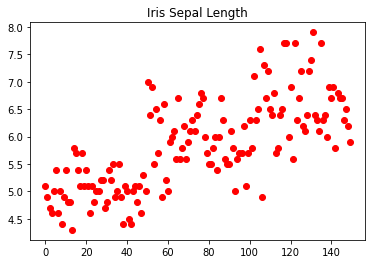

In [6]:
# Step 2 - Prepare the Data 

#
# Data Analysis
#
# Summarize the attributes, visualize with scatter plots 
# and histograms. Describe in detail each attirbute +
# relationships between them. 

import matplotlib.pyplot as plt

plt.title("Iris Sepal Length")
plt.scatter(data.index, data.sepal_length, color = 'r')


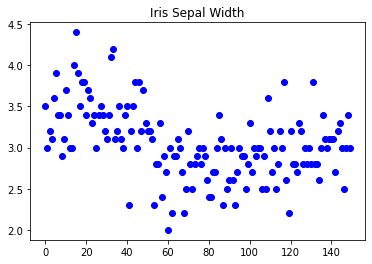

In [7]:
plt.title("Iris Sepal Width")
plt.scatter(data.index, data.sepal_width, color = 'b')

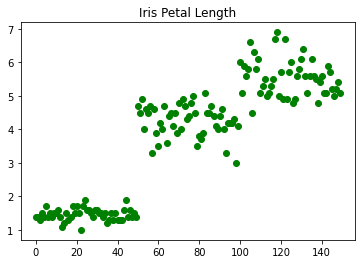

In [8]:
plt.title("Iris Petal Length")
plt.scatter(data.index, data.petal_length, color = 'g')

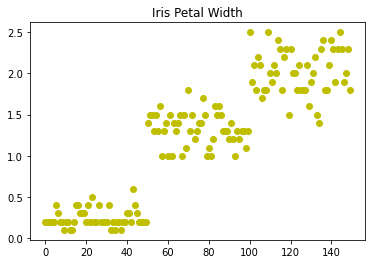

In [9]:
plt.title("Iris Petal Width")
plt.scatter(data.index, data.petal_width, color = 'y')

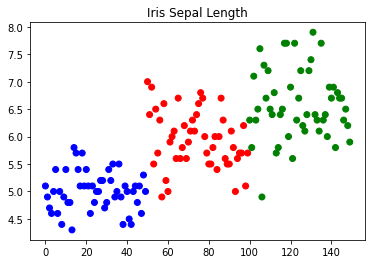

In [10]:
# How about we graph them with multiple colors corresponding
# to the paritcular class?
data_colors = {'Iris-setosa':'blue', 'Iris-versicolor': 'r', 'Iris-virginica': 'g'}


plt.title("Iris Sepal Length")
plt.scatter(data.index, data.sepal_length, color =data['class'].map(data_colors))

In [11]:
#
# Data Transformation
#
# Ready the dataset for ML by engineering features using scaling,
# attribute decomposition and attribute aggregation. 


# Split the data in to X and Y - Y being output variables. 

data_numpy = data.to_numpy()

# DATA EXPERMIENTATION:
# Dataset 1: (all)
X = data_numpy[:,0:4]

# Dataset 2: (no sepal width)
#X = np.delete(X, 1, 1) # 1 refers to column 1, last 1 refers to axis 1 (colums)

# Dataset 3: (no sepal width, no sepal length)
#X = np.delete(X, 0, 1)

Y = data_numpy[:,4]

# To avoid issue with Tensorflow value error when fitting model. 
X = np.asarray(X).astype('float')

In [12]:
# Feature scaling

"""
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()
# Fit the scaler on data
training_set_scaled = scaler.fit(training_set)

training_set_scaled
"""

from sklearn.preprocessing import MinMaxScaler

# Normalize the dataset. 
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)

In [13]:
# Encoding the output variable
#
# Something new for me - you need to do this for multiple
# classes! Good practice to reshape the output attribute from
# a vector to be a matrix with a boolean for each class variable.
#
# This is called ONE HOT ENCODING. 

# Note that np_utils is a SEPERATE pip package!

from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

encoder = LabelEncoder()
encoder.fit(Y)
Y_encoded = encoder.transform(Y)
# Convert integers to dummy variables using kears function to_categorical.
Y_dummy = to_categorical(Y_encoded)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [106]:
# Step 3 - Test Algorithms
#

# Utilize 10-fold cross validation with mean + std of accuracy
# over ten runs for each experiment. 

# NOTE: Not doing this tonight 
def execute_test(model, data):
    # Todo
    pass

In [107]:
X_scaled.shape

(150, 4)

In [108]:
Y_dummy.shape

(150, 3)

In [109]:
#
# Keras Neural Network 
#
# Selected because I'm familiar with it

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def baseline_model():
    layer_1_nodes = 10
    layer_2_nodes = 5

    # Define a simple neural network. Add Dense layers.  
    model = Sequential()
    model.add(Dense(layer_1_nodes, input_dim=4, activation='relu'))
    model.add(Dense(layer_2_nodes, activation='relu'))
    # Softmax to ensure range of 0 and 1 and may be used as predictable probabilities
    model.add(Dense(3, activation="softmax"))

    # Compile the model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

    return model


In [110]:
# Train the model 

# Fit the model. TODO: seperate this from this class. 
#model.fit(X_scaled, Y_dummy, epochs=150, batch_size=10)

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Use the KerasClassifier class that calls fit internally. We use
# KerasClassifier instead of just model.fit because this allows us
# to perform some wonderful evaluation functions later on. 
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5)

In [111]:
# Evaluate the model with k-fold cross validation. 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle=True)

results = cross_val_score(estimator, X_scaled, Y_dummy, cv=kfold)

Epoch 1/200
27/27 [==============================] - 0s 970us/step - loss: 1.0493 - accuracy: 0.3630
Epoch 2/200
27/27 [==============================] - 0s 1ms/step - loss: 1.0259 - accuracy: 0.3778
Epoch 3/200
27/27 [==============================] - 0s 1ms/step - loss: 1.0020 - accuracy: 0.3778
Epoch 4/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9747 - accuracy: 0.3852
Epoch 5/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9453 - accuracy: 0.3926
Epoch 6/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9161 - accuracy: 0.4074
Epoch 7/200
27/27 [==============================] - 0s 1ms/step - loss: 0.8871 - accuracy: 0.4074
Epoch 8/200
27/27 [==============================] - 0s 1ms/step - loss: 0.8581 - accuracy: 0.4370
Epoch 9/200
27/27 [==============================] - 0s 1ms/step - loss: 0.8329 - accuracy: 0.4222
Epoch 10/200
27/27 [==============================] - 0s 1ms/step - loss: 0.8088 - accuracy: 0.4889
Epoch 1

27/27 [==============================] - 0s 927us/step - loss: 0.0784 - accuracy: 0.9630
Epoch 163/200
27/27 [==============================] - 0s 931us/step - loss: 0.0801 - accuracy: 0.9481
Epoch 164/200
27/27 [==============================] - 0s 955us/step - loss: 0.0771 - accuracy: 0.9704
Epoch 165/200
27/27 [==============================] - 0s 932us/step - loss: 0.0817 - accuracy: 0.9481
Epoch 166/200
27/27 [==============================] - 0s 986us/step - loss: 0.0781 - accuracy: 0.9778
Epoch 167/200
27/27 [==============================] - 0s 950us/step - loss: 0.0775 - accuracy: 0.9630
Epoch 168/200
27/27 [==============================] - 0s 900us/step - loss: 0.0781 - accuracy: 0.9704
Epoch 169/200
27/27 [==============================] - 0s 989us/step - loss: 0.0776 - accuracy: 0.9481
Epoch 170/200
27/27 [==============================] - 0s 998us/step - loss: 0.0759 - accuracy: 0.9630
Epoch 171/200
27/27 [==============================] - 0s 938us/step - loss: 0.0761 - a

27/27 [==============================] - 0s 971us/step - loss: 0.1272 - accuracy: 0.9630
Epoch 122/200
27/27 [==============================] - 0s 957us/step - loss: 0.1267 - accuracy: 0.9630
Epoch 123/200
27/27 [==============================] - 0s 934us/step - loss: 0.1246 - accuracy: 0.9630
Epoch 124/200
27/27 [==============================] - 0s 946us/step - loss: 0.1249 - accuracy: 0.9630
Epoch 125/200
27/27 [==============================] - 0s 905us/step - loss: 0.1226 - accuracy: 0.9556
Epoch 126/200
27/27 [==============================] - 0s 939us/step - loss: 0.1207 - accuracy: 0.9556
Epoch 127/200
27/27 [==============================] - 0s 948us/step - loss: 0.1224 - accuracy: 0.9778
Epoch 128/200
27/27 [==============================] - 0s 927us/step - loss: 0.1188 - accuracy: 0.9556
Epoch 129/200
27/27 [==============================] - 0s 965us/step - loss: 0.1176 - accuracy: 0.9556
Epoch 130/200
27/27 [==============================] - 0s 902us/step - loss: 0.1166 - a

27/27 [==============================] - 0s 964us/step - loss: 0.1511 - accuracy: 0.9704
Epoch 80/200
27/27 [==============================] - 0s 968us/step - loss: 0.1491 - accuracy: 0.9630
Epoch 81/200
27/27 [==============================] - 0s 896us/step - loss: 0.1514 - accuracy: 0.9704
Epoch 82/200
27/27 [==============================] - 0s 912us/step - loss: 0.1464 - accuracy: 0.9630
Epoch 83/200
27/27 [==============================] - 0s 952us/step - loss: 0.1419 - accuracy: 0.9704
Epoch 84/200
27/27 [==============================] - 0s 914us/step - loss: 0.1407 - accuracy: 0.9704
Epoch 85/200
27/27 [==============================] - 0s 972us/step - loss: 0.1371 - accuracy: 0.9704
Epoch 86/200
27/27 [==============================] - 0s 914us/step - loss: 0.1384 - accuracy: 0.9704
Epoch 87/200
27/27 [==============================] - 0s 973us/step - loss: 0.1338 - accuracy: 0.9630
Epoch 88/200
27/27 [==============================] - 0s 942us/step - loss: 0.1314 - accuracy: 

27/27 [==============================] - 0s 919us/step - loss: 0.4194 - accuracy: 0.8000
Epoch 38/200
27/27 [==============================] - 0s 932us/step - loss: 0.4097 - accuracy: 0.9037
Epoch 39/200
27/27 [==============================] - 0s 891us/step - loss: 0.4019 - accuracy: 0.8222
Epoch 40/200
27/27 [==============================] - 0s 929us/step - loss: 0.3889 - accuracy: 0.9407
Epoch 41/200
27/27 [==============================] - 0s 920us/step - loss: 0.3753 - accuracy: 0.9407
Epoch 42/200
27/27 [==============================] - 0s 961us/step - loss: 0.3640 - accuracy: 0.9407
Epoch 43/200
27/27 [==============================] - 0s 982us/step - loss: 0.3537 - accuracy: 0.9407
Epoch 44/200
27/27 [==============================] - 0s 931us/step - loss: 0.3422 - accuracy: 0.9481
Epoch 45/200
27/27 [==============================] - 0s 914us/step - loss: 0.3325 - accuracy: 0.9481
Epoch 46/200
27/27 [==============================] - 0s 931us/step - loss: 0.3191 - accuracy: 

27/27 [==============================] - 0s 912us/step - loss: 0.0587 - accuracy: 0.9778
Epoch 197/200
27/27 [==============================] - 0s 954us/step - loss: 0.0582 - accuracy: 0.9852
Epoch 198/200
27/27 [==============================] - 0s 910us/step - loss: 0.0583 - accuracy: 0.9630
Epoch 199/200
27/27 [==============================] - 0s 934us/step - loss: 0.0600 - accuracy: 0.9778
Epoch 200/200
3/3 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9333
Epoch 1/200
27/27 [==============================] - 0s 996us/step - loss: 1.0811 - accuracy: 0.3259
Epoch 2/200
27/27 [==============================] - 0s 927us/step - loss: 1.0630 - accuracy: 0.3259
Epoch 3/200
27/27 [==============================] - 0s 966us/step - loss: 1.0476 - accuracy: 0.3333
Epoch 4/200
27/27 [==============================] - 0s 970us/step - loss: 1.0303 - accuracy: 0.3704
Epoch 5/200
27/27 [==============================] - 0s 944us/step - loss: 1.0061 - accuracy: 0.488

Epoch 155/200
27/27 [==============================] - 0s 917us/step - loss: 0.0913 - accuracy: 0.9556
Epoch 156/200
27/27 [==============================] - 0s 940us/step - loss: 0.0920 - accuracy: 0.9556
Epoch 157/200
27/27 [==============================] - 0s 946us/step - loss: 0.0936 - accuracy: 0.9556
Epoch 158/200
27/27 [==============================] - 0s 963us/step - loss: 0.0924 - accuracy: 0.9556
Epoch 159/200
27/27 [==============================] - 0s 904us/step - loss: 0.0905 - accuracy: 0.9556
Epoch 160/200
27/27 [==============================] - 0s 918us/step - loss: 0.0886 - accuracy: 0.9556
Epoch 161/200
27/27 [==============================] - 0s 1ms/step - loss: 0.0905 - accuracy: 0.9556
Epoch 162/200
27/27 [==============================] - 0s 909us/step - loss: 0.0885 - accuracy: 0.9556
Epoch 163/200
27/27 [==============================] - 0s 931us/step - loss: 0.0925 - accuracy: 0.9556
Epoch 164/200
27/27 [==============================] - 0s 951us/step - loss

27/27 [==============================] - 0s 930us/step - loss: 0.0444 - accuracy: 0.9926
Epoch 115/200
27/27 [==============================] - 0s 932us/step - loss: 0.0464 - accuracy: 0.9778
Epoch 116/200
27/27 [==============================] - 0s 930us/step - loss: 0.0487 - accuracy: 0.9778
Epoch 117/200
27/27 [==============================] - 0s 919us/step - loss: 0.0453 - accuracy: 0.9778
Epoch 118/200
27/27 [==============================] - 0s 968us/step - loss: 0.0453 - accuracy: 0.9778
Epoch 119/200
27/27 [==============================] - 0s 896us/step - loss: 0.0456 - accuracy: 0.9852
Epoch 120/200
27/27 [==============================] - 0s 917us/step - loss: 0.0425 - accuracy: 0.9852
Epoch 121/200
27/27 [==============================] - 0s 933us/step - loss: 0.0431 - accuracy: 0.9778
Epoch 122/200
27/27 [==============================] - 0s 909us/step - loss: 0.0417 - accuracy: 0.9852
Epoch 123/200
27/27 [==============================] - 0s 1ms/step - loss: 0.0418 - acc

27/27 [==============================] - 0s 905us/step - loss: 0.1611 - accuracy: 0.9630
Epoch 73/200
27/27 [==============================] - 0s 976us/step - loss: 0.1573 - accuracy: 0.9630
Epoch 74/200
27/27 [==============================] - 0s 962us/step - loss: 0.1571 - accuracy: 0.9556
Epoch 75/200
27/27 [==============================] - 0s 976us/step - loss: 0.1528 - accuracy: 0.9630
Epoch 76/200
27/27 [==============================] - 0s 969us/step - loss: 0.1484 - accuracy: 0.9630
Epoch 77/200
27/27 [==============================] - 0s 987us/step - loss: 0.1471 - accuracy: 0.9704
Epoch 78/200
27/27 [==============================] - 0s 963us/step - loss: 0.1446 - accuracy: 0.9630
Epoch 79/200
27/27 [==============================] - 0s 929us/step - loss: 0.1421 - accuracy: 0.9630
Epoch 80/200
27/27 [==============================] - 0s 975us/step - loss: 0.1428 - accuracy: 0.9630
Epoch 81/200
27/27 [==============================] - 0s 955us/step - loss: 0.1361 - accuracy: 

27/27 [==============================] - 0s 973us/step - loss: 0.3106 - accuracy: 0.9778
Epoch 32/200
27/27 [==============================] - 0s 1ms/step - loss: 0.3015 - accuracy: 0.9704
Epoch 33/200
27/27 [==============================] - 0s 1ms/step - loss: 0.2899 - accuracy: 0.9778
Epoch 34/200
27/27 [==============================] - 0s 977us/step - loss: 0.2817 - accuracy: 0.9704
Epoch 35/200
27/27 [==============================] - 0s 946us/step - loss: 0.2715 - accuracy: 0.9704
Epoch 36/200
27/27 [==============================] - 0s 921us/step - loss: 0.2637 - accuracy: 0.9778
Epoch 37/200
27/27 [==============================] - 0s 1ms/step - loss: 0.2568 - accuracy: 0.9704
Epoch 38/200
27/27 [==============================] - 0s 883us/step - loss: 0.2466 - accuracy: 0.9778
Epoch 39/200
27/27 [==============================] - 0s 972us/step - loss: 0.2385 - accuracy: 0.9704
Epoch 40/200
27/27 [==============================] - 0s 946us/step - loss: 0.2317 - accuracy: 0.9704

27/27 [==============================] - 0s 964us/step - loss: 0.0628 - accuracy: 0.9704
Epoch 191/200
27/27 [==============================] - 0s 915us/step - loss: 0.0655 - accuracy: 0.9704
Epoch 192/200
27/27 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9704
Epoch 193/200
27/27 [==============================] - 0s 921us/step - loss: 0.0620 - accuracy: 0.9704
Epoch 194/200
27/27 [==============================] - 0s 951us/step - loss: 0.0625 - accuracy: 0.9704
Epoch 195/200
27/27 [==============================] - 0s 951us/step - loss: 0.0637 - accuracy: 0.9704
Epoch 196/200
27/27 [==============================] - 0s 925us/step - loss: 0.0638 - accuracy: 0.9704
Epoch 197/200
27/27 [==============================] - 0s 936us/step - loss: 0.0630 - accuracy: 0.9704
Epoch 198/200
27/27 [==============================] - 0s 959us/step - loss: 0.0619 - accuracy: 0.9704
Epoch 199/200
27/27 [==============================] - 0s 945us/step - loss: 0.0612 - acc

27/27 [==============================] - 0s 1ms/step - loss: 0.1346 - accuracy: 0.9704
Epoch 150/200
27/27 [==============================] - 0s 991us/step - loss: 0.1334 - accuracy: 0.9630
Epoch 151/200
27/27 [==============================] - 0s 993us/step - loss: 0.1314 - accuracy: 0.9630
Epoch 152/200
27/27 [==============================] - 0s 1ms/step - loss: 0.1326 - accuracy: 0.9704
Epoch 153/200
27/27 [==============================] - 0s 1ms/step - loss: 0.1292 - accuracy: 0.9630
Epoch 154/200
27/27 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.9704
Epoch 155/200
27/27 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.9630
Epoch 156/200
27/27 [==============================] - 0s 1ms/step - loss: 0.1256 - accuracy: 0.9704
Epoch 157/200
27/27 [==============================] - 0s 1ms/step - loss: 0.1239 - accuracy: 0.9704
Epoch 158/200
27/27 [==============================] - 0s 1ms/step - loss: 0.1246 - accuracy: 0.9556


27/27 [==============================] - 0s 904us/step - loss: 0.0817 - accuracy: 0.9630
Epoch 111/200
27/27 [==============================] - 0s 985us/step - loss: 0.0800 - accuracy: 0.9630
Epoch 112/200
27/27 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9630
Epoch 113/200
27/27 [==============================] - 0s 948us/step - loss: 0.0801 - accuracy: 0.9630
Epoch 114/200
27/27 [==============================] - 0s 1ms/step - loss: 0.0787 - accuracy: 0.9630
Epoch 115/200
27/27 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9630
Epoch 116/200
27/27 [==============================] - 0s 977us/step - loss: 0.0756 - accuracy: 0.9630
Epoch 117/200
27/27 [==============================] - 0s 922us/step - loss: 0.0795 - accuracy: 0.9556
Epoch 118/200
27/27 [==============================] - 0s 951us/step - loss: 0.0785 - accuracy: 0.9630
Epoch 119/200
27/27 [==============================] - 0s 969us/step - loss: 0.0788 - accurac

In [112]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 95.33% (7.92%)
